In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/train.csv')

In [3]:
df

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [15]:
from sklearn.model_selection import GroupKFold

In [17]:
kfold = GroupKFold(n_splits=5)

In [19]:
for fold_number, (train_index, val_index) in enumerate(kfold.split(X=df.index, y=df['label_group'], groups=df['label_group'])):
    df.loc[df.iloc[val_index].index, 'fold'] = fold_number

In [20]:
df

,posting_id,image,image_phash,title,label_group,fold
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,3.0
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,3.0
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,4.0
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,3.0
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,1.0
...,...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725,2.0
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533,4.0
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785,4.0
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013,1.0


In [26]:
df[df['label_group'].isin(df[df['fold'] == 4]['label_group'])]['fold'].describe()

count    6850.0
mean        4.0
std         0.0
min         4.0
25%         4.0
50%         4.0
75%         4.0
max         4.0
Name: fold, dtype: float64

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='label_group', ylabel='Count'>

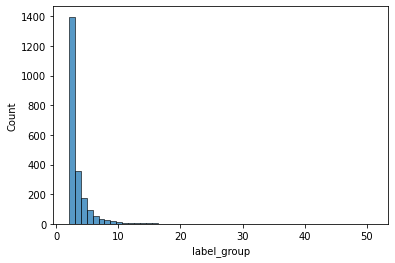

In [30]:
sns.histplot(df[df['fold'] == 0]['label_group'].value_counts(), bins=51)

<AxesSubplot:xlabel='label_group', ylabel='Count'>

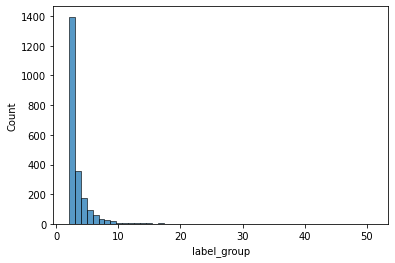

In [31]:
sns.histplot(df[df['fold'] == 1]['label_group'].value_counts(), bins=51)

<AxesSubplot:xlabel='label_group', ylabel='Count'>

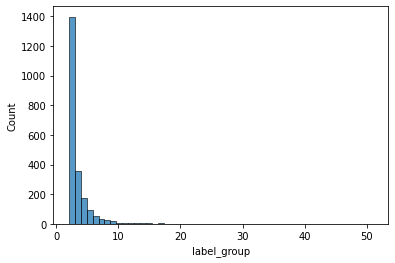

In [32]:
sns.histplot(df[df['fold'] == 2]['label_group'].value_counts(), bins=51)

<AxesSubplot:xlabel='label_group', ylabel='Count'>

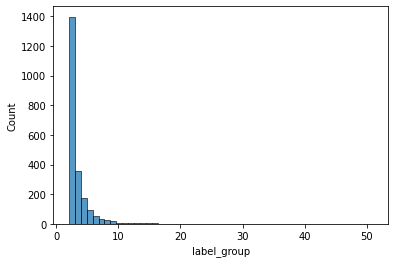

In [33]:
sns.histplot(df[df['fold'] == 3]['label_group'].value_counts(), bins=51)

<AxesSubplot:xlabel='label_group', ylabel='Count'>

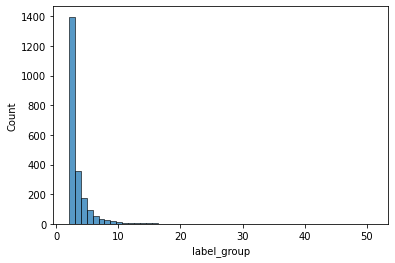

In [34]:
sns.histplot(df[df['fold'] == 4]['label_group'].value_counts(), bins=51)

In [35]:
df.to_csv('../dataset/train_fold.csv', index=False)